
# Project#2: A Peek Inside Films Industry :)

> **Developed By**: Rakan Yamani on March 23, 2019 - as psrt of Udacity Data Analyst Nanodegree program (DAND)



## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
     <ul>
        <li><a href="#eda">General Overview</a></li>
        <li><a href="#eda">Data Cleaning</a></li>
        <li><a href="#eda">Data Preparation</a></li>
    </ul>
<li><a href="#eda">Exploratory Data Analysis</a></li>
    <ul>
        <li><a href="#eda">Part#1: What are the most influential factors in the film industry?</a></li>
        <li><a href="#eda">Part#2: How have these factors changed over time? </a></li>
        <li><a href="#eda">Part#3: What are the most profitable times in film industry? </a></li>
        <li><a href="#eda">Part#4: Some interesting facts about the giants of the film industry</a></li>
    </ul>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

![](film.jpg)

<a id='intro'></a>
## Introduction

>As described in the project details, the provided data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. Keep in mind that:
>- Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.
>- There are some odd characters in the ‘cast’ column. No need to worry about cleaning them, they can be ignored.
>- The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.


In [50]:
# Import statements for all required packages:
import pandas as pd
import numpy as np
import calendar
import matplotlib.pyplot as plt
%matplotlib inline

# Load given movies dataset into a dataframe:
tmdb_df = pd.read_csv('tmdb-movies.csv')

Let's discover the dataset that we have even more :)


<a id='wrangling'></a>
## Data Wrangling

> **Note**: In this section of the report, the original dateset will be loaded, checked for cleanliness, trimed and cleaned for analysis. 

### \*~| General Properties |*~

 >The original dataset has the following properties:
     * Total number of rows      : 10866
     * Total number of columns   : 21
     * Columns data types        : float64(4), int64(6), object(11)
     * Duplicated data           : 1
     * Columns with missing data : 9
                                   -> imdb_id
                                   -> cast
                                   -> homepage
                                   -> director
                                   -> tagline
                                   -> keywords
                                   -> overview
                                   -> genres
                                   -> production_companies

In [51]:
# This returns a tuple of the dimensions of the dataframe (Rows,Columns):
tmdb_df.shape

(10866, 21)

In [52]:
# Quick overview of the dataset:
tmdb_df.head()

id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      http://www.jurassicworld.com/   Colin Trevorrow   
1                        http://www.madmaxmovie.com/     George Miller   
2     http://www.thedivergentseries.movie/#insurgent  Robert Schwentke   
3  http://www.starwars.com/films/star-wars-episod...       J.J. Abrams   
4                           http://www.furious7.com/         James Wan   

                         tagline  ...  \
0              The park is open.  ...   
1             What a Lovely Day.  ...   
2     One Choice Can Destroy You  ...   
3  Every generation has a story.  ...   
4            Vengeance Hits Home  ...   

                                            overview runtime  \
0  Twenty-two years after the events of Jurassic ...     124   
1  An apocalyptic story set in the furthest reach...     120   
2  Beatrice Prior must confront her inner demons ...     119   
3  Thirty years after defeating the Galactic Empi...     136   
4  Deckard Shaw seeks revenge against Dominic Tor...     137   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   
3   Action|Adventure|Science Fiction|Fantasy   
4                      Action|Crime|Thriller   

                                production_companies release_date vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15       5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15       6185   
2  Summit Entertainment|Mandeville Films|Red Wago...      3/18/15       2480   
3          Lucasfilm|Truenorth Productions|Bad Robot     12/15/15       5292   
4  Universal Pictures|Original Film|Media Rights ...       4/1/15       2947   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  
2           6.3          2015  1.012000e+08  2.716190e+08  
3           7.5          2015  1.839999e+08  1.902723e+09  
4           7.3          2015  1.747999e+08  1.385749e+09  

[5 rows x 21 columns]

#### To have a better understanding of the provided details of each movie, let's view the index number and label for each column:

In [53]:
for i, v in enumerate(tmdb_df.columns):
    print(i, v)

0 id
1 imdb_id
2 popularity
3 budget
4 revenue
5 original_title
6 cast
7 homepage
8 director
9 tagline
10 keywords
11 overview
12 runtime
13 genres
14 production_companies
15 release_date
16 vote_count
17 vote_average
18 release_year
19 budget_adj
20 revenue_adj


In [54]:
# This prints information about a DataFrame including the index dtype and column dtypes:
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [55]:
# This returns the number of null values in each column:
tmdb_df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [56]:
# This returns the number of duplicated unique elements in the dataset:
sum(tmdb_df.duplicated())

1


### \*~| Data Cleaning |~*

 ### Some concerns with the current dataset: 
 The current data set has some issues that need to be addressed before proceeding with the analysis: 
 
   1. Deleting unncessary columns for the current study.
   2. Handling columns with missing data.                  
   3. Handling columns with zero values.
   4. Deleting duplicated rows.
   5. Changing columns with unformatted datatype.
   
    
    
    


#### 1. Deleting unncessary columns:
The following columns are not required for this study: 
>- id
- imdb_id
- homepage
- tagline
- overview
- budget_adj
- revenue_adj

In [57]:
# This drops the listed columns in DeletedCol from the dataset:
DeletedCol = ['id','imdb_id', 'homepage', 'tagline', 'overview','director','production_companies','popularity','vote_count','vote_average', 'budget_adj', 'revenue_adj']
tmdb_df.drop(DeletedCol, axis=1, inplace=True)

Well, for organizing purposes let's reorder the columns so we have the movie original title as an ID for the row

In [58]:
# Re-order dataset's columns:
tmdb_df = tmdb_df[['original_title','revenue','budget','release_date','release_year',
                   'cast','keywords','genres','runtime']]

In [59]:
for i, v in enumerate(tmdb_df.columns):
    print(i, v)

0 original_title
1 revenue
2 budget
3 release_date
4 release_year
5 cast
6 keywords
7 genres
8 runtime


#### 2. Handling columns with missing data:
As shown below, this is the count of all missing values in each column: cast (76), director (44), genres(23) production_companies (1030), keywords (1493). The obviouse solution is to delete any row with missing data, however, this will effect the integrity of our data espicially if many rows will be deleted. Therefore, only columns with few null values will be selectd: 
>* cast
* director
* genres

In [60]:
# This returns the number of null values in each column:
tmdb_df.isnull().sum()

original_title       0
revenue              0
budget               0
release_date         0
release_year         0
cast                76
keywords          1493
genres              23
runtime              0
dtype: int64

In [61]:
# This drops the listed columns in DeletedCol from the dataset:
ColWihtNulls = ['cast', 'genres']
tmdb_df.dropna(subset=ColWihtNulls, inplace=True)  

In [62]:
tmdb_df.isnull().sum()

original_title       0
revenue              0
budget               0
release_date         0
release_year         0
cast                 0
keywords          1445
genres               0
runtime              0
dtype: int64

#### 3. Handling columns with zero values:


Next let's work with some unrealistic values in the dataset that were replaced by the value Zero (0). This might be for the fact that the acutal value is not given or unknow. First let's see which columns are affected this. To do that, Query and length functions will be used as follows:

In [63]:
def ColumnsWithZeros():
    for column in tmdb_df:
        # Bulding query statments:
        query = column +  '==0'
        # Counting zeros:
        length = len(tmdb_df.query(query))
        # Print only colums with zero values + the count of zeros:
        if length > 0: 
            print (column , length)
            
ColumnsWithZeros()

revenue 5923
budget 5610
runtime 30


As we can see, there are many rows in both Revenue and Budget columns with zero values, unlike Runtime column. Deleting those rows will result in deleting almost half of the dataset which will defenetly affect the integrity of the data. So to overcome this:
- **Step #1:** Zero values in Revenue and Budget columns will be changed to NaN. 
- **Step #2:** Rows with zero values in Runtime column will be droped. 

In [64]:
# Step 1: 
ColWihtZeros = ['revenue','budget','runtime']
tmdb_df[ColWihtZeros] = tmdb_df[ColWihtZeros].replace(0,np.nan)

# Step 2: 
tmdb_df.dropna(subset={'runtime'}, inplace=True)

# Check columns for zero values:
ColumnsWithZeros()

#### 4. Deleting duplicated rows:

In [65]:
tmdb_df[tmdb_df.duplicated()]

original_title   revenue      budget release_date  release_year  \
2090         TEKKEN  967000.0  30000000.0      3/20/10          2010   

                                                   cast  \
2090  Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...   

                                               keywords  \
2090  martial arts|dystopia|based on video game|mart...   

                                           genres  runtime  
2090  Crime|Drama|Action|Thriller|Science Fiction     92.0

In [66]:
tmdb_df.drop_duplicates(inplace=True)
sum(tmdb_df.duplicated())

0

#### 5. Changing columns with unformatted datatype:

To Prepare the data for the analysis , some columns' datatypes need to be changes as follows:

- runtime      -> int64
- release_date -> datetime

In [67]:
# Printing each column with it's datatype:
for column in tmdb_df:
    print (column ,type(tmdb_df[column][0]))

original_title <class 'str'>
revenue <class 'numpy.float64'>
budget <class 'numpy.float64'>
release_date <class 'str'>
release_year <class 'numpy.int64'>
cast <class 'str'>
keywords <class 'str'>
genres <class 'str'>
runtime <class 'numpy.float64'>


In [68]:
tmdb_df['runtime'] = tmdb_df['runtime'].astype('int64')
tmdb_df['release_date'] = tmdb_df['release_date'].astype('datetime64[ns]')
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10737 entries, 0 to 10865
Data columns (total 9 columns):
original_title    10737 non-null object
revenue           4844 non-null float64
budget            5154 non-null float64
release_date      10737 non-null datetime64[ns]
release_year      10737 non-null int64
cast              10737 non-null object
keywords          9307 non-null object
genres            10737 non-null object
runtime           10737 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 1.1+ MB



### \*~| Data Preparation |~*


Before diving into the analysis, some columns needs to be calculated and added to the dataset

### Total Profit Column
The profit column holds the net profit of each movie by calculating the difference between movies revenues and budget: `Profit = Revenue - Budget`. Columns can be added by simply naming a new column and assigning its value to it. The function Insert() will be used this time to place the column in the right index.  
> Insert "Profit" columns @ index 3

In [69]:
# Using DataFrame.insert() to add new columns:

# Inserting "Profit" Column:
tmdb_df.insert(3, 'profit', tmdb_df['revenue']-tmdb_df['budget'] , True) 
tmdb_df.head(2)

original_title       revenue       budget        profit release_date  \
0      Jurassic World  1.513529e+09  150000000.0  1.363529e+09   2015-06-09   
1  Mad Max: Fury Road  3.784364e+08  150000000.0  2.284364e+08   2015-05-13   

   release_year                                               cast  \
0          2015  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1          2015  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   

                                            keywords  \
0  monster|dna|tyrannosaurus rex|velociraptor|island   
1   future|chase|post-apocalyptic|dystopia|australia   

                                      genres  runtime  
0  Action|Adventure|Science Fiction|Thriller      124  
1  Action|Adventure|Science Fiction|Thriller      120

### Dates Columns
To make the counting and grouping much easier, the `release_date` will be breaked-down into 4 columns: [day, week, month, season]. Each column will be drafted from the original release_date column: 
* release_day: holds **the day of the week** in which the movie was released. 
* release_week: holds **the week number** in which the movie was released. 
* release_month: holds **the month** in which the movie was released. 
* release_season: holds **the season** in which the movie was released. 

The function Insert() will be used to place the column in the right index.  
> * Insert "release_day" column @ index 5
> * Insert "release_week" column @ index 6
> * Insert "release_month" column @ index 7
> * Insert "release_season" column @ index 8

In [70]:
# Inserting "release_day" Column:-
tmdb_df.insert(5, 'release_day', tmdb_df['release_date'].dt.day_name() , True) 

# Inserting "release_week" Column:-
tmdb_df.insert(6, 'release_week', tmdb_df['release_date'].dt.week , True) 

# Inserting "release_month" Column:-
tmdb_df.insert(7, 'release_month', tmdb_df['release_date'].dt.month , True) 

# Inserting "release_season" Column:-
# create a new column with empty values:
season_values = np.repeat('', tmdb_df.shape[0])
tmdb_df.insert(8, 'release_season', season_values , True)

# function to determine the season based on the month values:
def MonthToSeason(x):
    if (x >=3 and x<6):
        return 'Spring'
    elif (x >=6 and x<9):
        return 'Summer'
    elif (x >=9 and x<12):
        return 'Autumn'
    else:
        return 'Winter'
# re-assinging seasons values on "release_season" column:
tmdb_df['release_season'] = tmdb_df['release_month'].apply(MonthToSeason)
tmdb_df['release_month'] = tmdb_df['release_month'].apply(lambda x: calendar.month_abbr[x])
tmdb_df.head(10)

original_title       revenue       budget        profit  \
0                Jurassic World  1.513529e+09  150000000.0  1.363529e+09   
1            Mad Max: Fury Road  3.784364e+08  150000000.0  2.284364e+08   
2                     Insurgent  2.952382e+08  110000000.0  1.852382e+08   
3  Star Wars: The Force Awakens  2.068178e+09  200000000.0  1.868178e+09   
4                     Furious 7  1.506249e+09  190000000.0  1.316249e+09   
5                  The Revenant  5.329505e+08  135000000.0  3.979505e+08   
6            Terminator Genisys  4.406035e+08  155000000.0  2.856035e+08   
7                   The Martian  5.953803e+08  108000000.0  4.873803e+08   
8                       Minions  1.156731e+09   74000000.0  1.082731e+09   
9                    Inside Out  8.537086e+08  175000000.0  6.787086e+08   

  release_date release_day  release_week release_month release_season  \
0   2015-06-09     Tuesday            24           Jun         Summer   
1   2015-05-13   Wednesday            20           May         Spring   
2   2015-03-18   Wednesday            12           Mar         Spring   
3   2015-12-15     Tuesday            51           Dec         Winter   
4   2015-04-01   Wednesday            14           Apr         Spring   
5   2015-12-25      Friday            52           Dec         Winter   
6   2015-06-23     Tuesday            26           Jun         Summer   
7   2015-09-30   Wednesday            40           Sep         Autumn   
8   2015-06-17   Wednesday            25           Jun         Summer   
9   2015-06-09     Tuesday            24           Jun         Summer   

   release_year                                               cast  \
0          2015  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1          2015  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2          2015  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3          2015  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4          2015  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   
5          2015  Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...   
6          2015  Arnold Schwarzenegger|Jason Clarke|Emilia Clar...   
7          2015  Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...   
8          2015  Sandra Bullock|Jon Hamm|Michael Keaton|Allison...   
9          2015  Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...   

                                            keywords  \
0  monster|dna|tyrannosaurus rex|velociraptor|island   
1   future|chase|post-apocalyptic|dystopia|australia   
2  based on novel|revolution|dystopia|sequel|dyst...   
3              android|spaceship|jedi|space opera|3d   
4                car race|speed|revenge|suspense|car   
5  father-son relationship|rape|based on novel|mo...   
6  saving the world|artificial intelligence|cybor...   
7        based on novel|mars|nasa|isolation|botanist   
8  assistant|aftercreditsstinger|duringcreditssti...   
9       dream|cartoon|imaginary friend|animation|kid   

                                      genres  runtime  
0  Action|Adventure|Science Fiction|Thriller      124  
1  Action|Adventure|Science Fiction|Thriller      120  
2         Adventure|Science Fiction|Thriller      119  
3   Action|Adventure|Science Fiction|Fantasy      136  
4                      Action|Crime|Thriller      137  
5           Western|Drama|Adventure|Thriller      156  
6  Science Fiction|Action|Thriller|Adventure      125  
7            Drama|Adventure|Science Fiction      141  
8          Family|Animation|Adventure|Comedy       91  
9                    Comedy|Animation|Family       94

### Final Dataset ~*

#### This is the final dateset that will be used for the analysis:-

In [71]:
tmdb_df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10737 entries, 0 to 10865
Data columns (total 14 columns):
original_title    10737 non-null object
revenue           4844 non-null float64
budget            5154 non-null float64
profit            3850 non-null float64
release_date      10737 non-null datetime64[ns]
release_day       10737 non-null object
release_week      10737 non-null int64
release_month     10737 non-null object
release_season    10737 non-null object
release_year      10737 non-null int64
cast              10737 non-null object
keywords          9307 non-null object
genres            10737 non-null object
runtime           10737 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(3), object(7)
memory usage: 1.5+ MB


<a id='eda'></a>
## Exploratory Data Analysis

The study will walk through the following interesting questions: 

### Part#1: What are the most influential factors in the film industry?
To answer this question, both the Highest and Lowest values will be shown for the following factors:
* Runtime
* Budget 
* Revenue
* Profit

For efficiency, the function Min_Max() has been created to provide the desired output:


In [72]:
# This function returns the minimum and the maximum details of a given column:
def MaxMin(df,col_name):
    return pd.concat((pd.DataFrame(df.loc[df[col_name].idxmax()]), 
                       pd.DataFrame(df.loc[df[col_name].idxmin()])), axis = 1) 

A quick overview of the data: 

In [73]:
tmdb_df.describe()

revenue        budget        profit  release_week  release_year  \
count  4.844000e+03  5.154000e+03  3.850000e+03  10737.000000  10737.000000   
mean   8.932364e+07  3.082252e+07  7.054939e+07     28.241222   2001.257334   
std    1.621417e+08  3.893039e+07  1.506830e+08     14.963876     12.822022   
min    2.000000e+00  1.000000e+00 -4.139124e+08      1.000000   1960.000000   
25%    7.784130e+06  6.000000e+06 -1.311884e+06     16.000000   1995.000000   
50%    3.190530e+07  1.750000e+07  2.008885e+07     30.000000   2006.000000   
75%    1.000000e+08  4.000000e+07  8.191634e+07     41.000000   2011.000000   
max    2.781506e+09  4.250000e+08  2.544506e+09     53.000000   2015.000000   

            runtime  
count  10737.000000  
mean     102.699544  
std       30.470645  
min        3.000000  
25%       90.000000  
50%       99.000000  
75%      112.000000  
max      900.000000

#### 1.1 Runtime Factor: 


In [74]:
MaxMin(tmdb_df,'runtime')

3894  \
original_title                      The Story of Film: An Odyssey   
revenue                                                       NaN   
budget                                                        NaN   
profit                                                        NaN   
release_date                                  2011-09-03 00:00:00   
release_day                                              Saturday   
release_week                                                   35   
release_month                                                 Sep   
release_season                                             Autumn   
release_year                                                 2011   
cast            Mark Cousins|Jean-Michel Frodon|Cari Beauchamp...   
keywords        cinema|nouvelle vague|hindi cinema|cinema novo...   
genres                                                Documentary   
runtime                                                       900   

                                                             1112  
original_title                               Batman: Strange Days  
revenue                                                       NaN  
budget                                                        NaN  
profit                                                        NaN  
release_date                                  2014-04-09 00:00:00  
release_day                                             Wednesday  
release_week                                                   15  
release_month                                                 Apr  
release_season                                             Spring  
release_year                                                 2014  
cast                        Kevin Conroy|Brian George|Tara Strong  
keywords        dc comics|superhero|based on comic book|noir|p...  
genres                                           Action|Animation  
runtime                                                         3

Interestingly, as shown above, the **longest** movie made in the history was [**The Story of Film: An Odyssey**] that was released in the summer of [**2011**]. The movie was made of **15 one-hour** chapters as per its [wiki](https://en.wikipedia.org/wiki/The_Story_of_Film:_An_Odyssey) page. ![](https://upload.wikimedia.org/wikipedia/en/0/0a/The_Story_of_Film_-_An_Odyssey_%28poster%29.jpg).

The **shortest** movie made in the history was [**Batman: Strange Days**] that was released in the winter of [**2015**]. The movie's duration was just **3 mins** as per its [wiki](https://en.wikipedia.org/wiki/Batman:_Strange_Days) page. ![](https://upload.wikimedia.org/wikipedia/en/0/07/Batman_Strange_Days.jpg)

#### 1.2 Budget Factor: 
Unfortionatly, due to **NaN** values that have been placed for **Zero bugets and revenues**, the dataset need to be modified to overcome this issue. Thus, the **Mean** value will be placed in replace for NaN in both columns but in a seperate dataset. 

In [75]:
# Cretae a copy of the movies dataset "tmdb_df":
tmdb_no_nulls_df = tmdb_df.copy(True)

# Fill Nan values with the mean in each column:
tmdb_no_nulls_df['revenue'].fillna((tmdb_no_nulls_df['revenue'].mean()), inplace=True)
tmdb_no_nulls_df['budget'].fillna((tmdb_no_nulls_df['revenue'].mean()), inplace=True)
tmdb_no_nulls_df['profit'].fillna((tmdb_no_nulls_df['profit'].mean()), inplace=True)

In [76]:
MaxMin(tmdb_no_nulls_df,'budget')

2244  \
original_title                                  The Warrior's Way   
revenue                                               1.10876e+07   
budget                                                   4.25e+08   
profit                                               -4.13912e+08   
release_date                                  2010-12-02 00:00:00   
release_day                                              Thursday   
release_week                                                   48   
release_month                                                 Dec   
release_season                                             Winter   
release_year                                                 2010   
cast            Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...   
keywords        assassin|small town|revenge|deception|super speed   
genres                  Adventure|Fantasy|Action|Western|Thriller   
runtime                                                       100   

                                                             1151  
original_title                                        Fear Clinic  
revenue                                               8.93236e+07  
budget                                                          1  
profit                                                7.05494e+07  
release_date                                  2014-10-31 00:00:00  
release_day                                                Friday  
release_week                                                   44  
release_month                                                 Oct  
release_season                                             Autumn  
release_year                                                 2014  
cast            Thomas Dekker|Robert Englund|Cleopatra Coleman...  
keywords                                       phobia|doctor|fear  
genres                                                     Horror  
runtime                                                        95

As shown above, the movie with **largest** budget in the history was [**The Warrior's Way**] that was released in the winter of [**2010**]. The movie has a budget of **425,000,000 Dollar**. For more: here is the movie's [wiki](https://en.wikipedia.org/wiki/The_Warrior%27s_Way) page. ![](https://upload.wikimedia.org/wikipedia/en/1/19/The_Warrior%27s_Way_Poster.jpg).

The **Lowest** movie's budget in the dataset was for [**Fear Clinic**] that was released in the autumn of [**2014**]. The budget was ONLY **1 dollar!!!** For more: here is the movie's [wiki](https://en.wikipedia.org/wiki/Fear_Clinic_(film)) page. ![](https://upload.wikimedia.org/wikipedia/en/d/da/Fear_Clinic_film_poster.jpg)

#### 1.3 Revenue Factor: 

In [77]:
MaxMin(tmdb_no_nulls_df,'revenue')

1386  \
original_title                                             Avatar   
revenue                                               2.78151e+09   
budget                                                   2.37e+08   
profit                                                2.54451e+09   
release_date                                  2009-12-10 00:00:00   
release_day                                              Thursday   
release_week                                                   50   
release_month                                                 Dec   
release_season                                             Winter   
release_year                                                 2009   
cast            Sam Worthington|Zoe Saldana|Sigourney Weaver|S...   
keywords        culture clash|future|space war|space colony|so...   
genres                   Action|Adventure|Fantasy|Science Fiction   
runtime                                                       162   

                                                             5067  
original_title                                    Shattered Glass  
revenue                                                         2  
budget                                                      6e+06  
profit                                                     -6e+06  
release_date                                  2003-11-14 00:00:00  
release_day                                                Friday  
release_week                                                   46  
release_month                                                 Nov  
release_season                                             Autumn  
release_year                                                 2003  
cast            Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...  
keywords                                                      NaN  
genres                                              Drama|History  
runtime                                                        94

As shown above, the movie with **largest** revenue in the history was [**Avatar**] that was released in the winter of [**2009**]. The movie has a revenue of **2,782,000,000 Dollar!!** For more: here is the movie's [wiki](https://en.wikipedia.org/wiki/Avatar_(2009_film)) page. ![](https://upload.wikimedia.org/wikipedia/en/b/b0/Avatar-Teaser-Poster.jpg).

The **Lowest** movie's budget in the dataset was for [**Shattered Glass**] that was released in the autumn of [**2014**]. The budget was ONLY **1 dollar!!!** For more: here is the movie's [wiki](https://en.wikipedia.org/wiki/Shattered_Glass_(film)) page. ![](https://upload.wikimedia.org/wikipedia/en/5/53/Shattered_Glass_movie.jpg)

#### 1.4 Profit Factor: 

In [78]:
MaxMin(tmdb_no_nulls_df,'profit')

1386  \
original_title                                             Avatar   
revenue                                               2.78151e+09   
budget                                                   2.37e+08   
profit                                                2.54451e+09   
release_date                                  2009-12-10 00:00:00   
release_day                                              Thursday   
release_week                                                   50   
release_month                                                 Dec   
release_season                                             Winter   
release_year                                                 2009   
cast            Sam Worthington|Zoe Saldana|Sigourney Weaver|S...   
keywords        culture clash|future|space war|space colony|so...   
genres                   Action|Adventure|Fantasy|Science Fiction   
runtime                                                       162   

                                                             2244  
original_title                                  The Warrior's Way  
revenue                                               1.10876e+07  
budget                                                   4.25e+08  
profit                                               -4.13912e+08  
release_date                                  2010-12-02 00:00:00  
release_day                                              Thursday  
release_week                                                   48  
release_month                                                 Dec  
release_season                                             Winter  
release_year                                                 2010  
cast            Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...  
keywords        assassin|small town|revenge|deception|super speed  
genres                  Adventure|Fantasy|Action|Western|Thriller  
runtime                                                       100

As shown above, the movie with **Greatest** profit in the history of film industry was [**Avatar**] that was released in the winter of [**2009**]. The movie has a net profit of **2,546,000,000 Dollar!!** The movie also had the largest revenue as shown in the previous section. For more: here is the movie's [wiki](https://en.wikipedia.org/wiki/Avatar_(2009_film)) page. ![](https://upload.wikimedia.org/wikipedia/en/b/b0/Avatar-Teaser-Poster.jpg).

The **Lowest** movie's profit in the dataset was for [**The Warrior's Way**] that was released in the autumn of [**2014**]. The movie's budget was the greatest, however, the movie didn't achieve the expected results which reflects in its net profit of **- 4,140,000,000 dollar!!!** For more: here is the movie's [wiki](https://en.wikipedia.org/wiki/The_Warrior%27s_Way) page. ![](https://upload.wikimedia.org/wikipedia/en/1/19/The_Warrior%27s_Way_Poster.jpg)

### Part#2: How have these factors changed over time?

The previous four factors `Runtime, Budget, Revenue & Profit` have been changed significantly over the history. The dataset shows movies' history over **55 years** from (1960) to (2015). To see how those four factors changed, the average values of those four factors over the years need to be calculated.

##### 2.1 Calculating the average Runtime, Budget, Revenue and Profit for each year: 

In [79]:
# Calculating the average values per year:
AvgRuntimePerYear = tmdb_df.groupby('release_year')['runtime'].mean()
AvgBudgetPerYear = tmdb_df.groupby('release_year')['budget'].mean()
AvgRevenuePerYear = tmdb_df.groupby('release_year')['revenue'].mean()
AvgProfitPerYear = tmdb_df.groupby('release_year')['profit'].mean()

# Display the calculated sets:
pd.concat((pd.DataFrame(AvgRuntimePerYear), pd.DataFrame(AvgBudgetPerYear), pd.DataFrame(AvgRevenuePerYear)
           ,pd.DataFrame(AvgProfitPerYear)), axis = 1).head()

runtime        budget       revenue        profit
release_year                                                      
1960          110.656250  2.450772e+06  2.071500e+07  2.163961e+07
1961          119.419355  3.549000e+06  3.377202e+07  2.990832e+07
1962          124.343750  3.908723e+06  2.395332e+07  2.383998e+07
1963          111.323529  6.666500e+06  2.677214e+07  1.923531e+07
1964          109.214286  3.589378e+06  4.262272e+07  4.209691e+07

##### 2.1.1 Ploting the average Runtime over the years: 

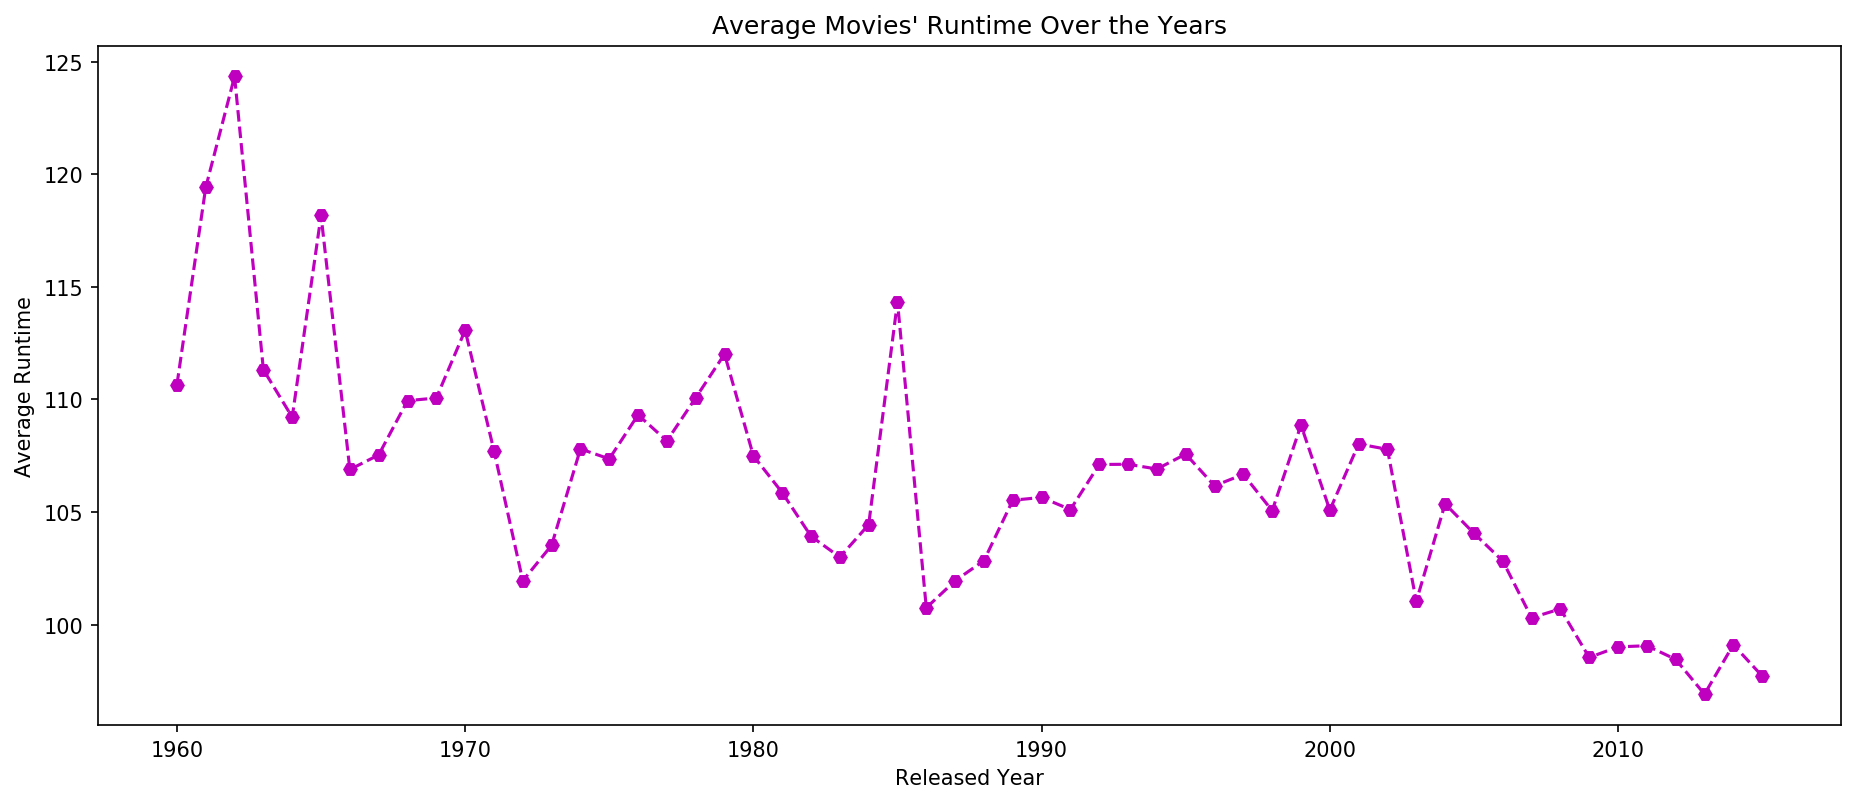

In [80]:
# Plot's Dimensions
plt.figure(figsize=(15,6), dpi = 150)

# Plot Titel & Axes' Labels
plt.title("Average Movies' Runtime Over the Years")
plt.xlabel('Released Year', fontsize = 10)
plt.ylabel('Average Runtime', fontsize = 10)

# Plotting
plt.plot(AvgRuntimePerYear, 'm--H')
plt.show()

Interestingly, film industry tends to be close to an hour and half **(1:30) hours**. This period is quite convenient to ensure that the followers remain fully engaged and focused on the content.

##### 2.1.2 Ploting the average Budget and Revenue  over the years: 

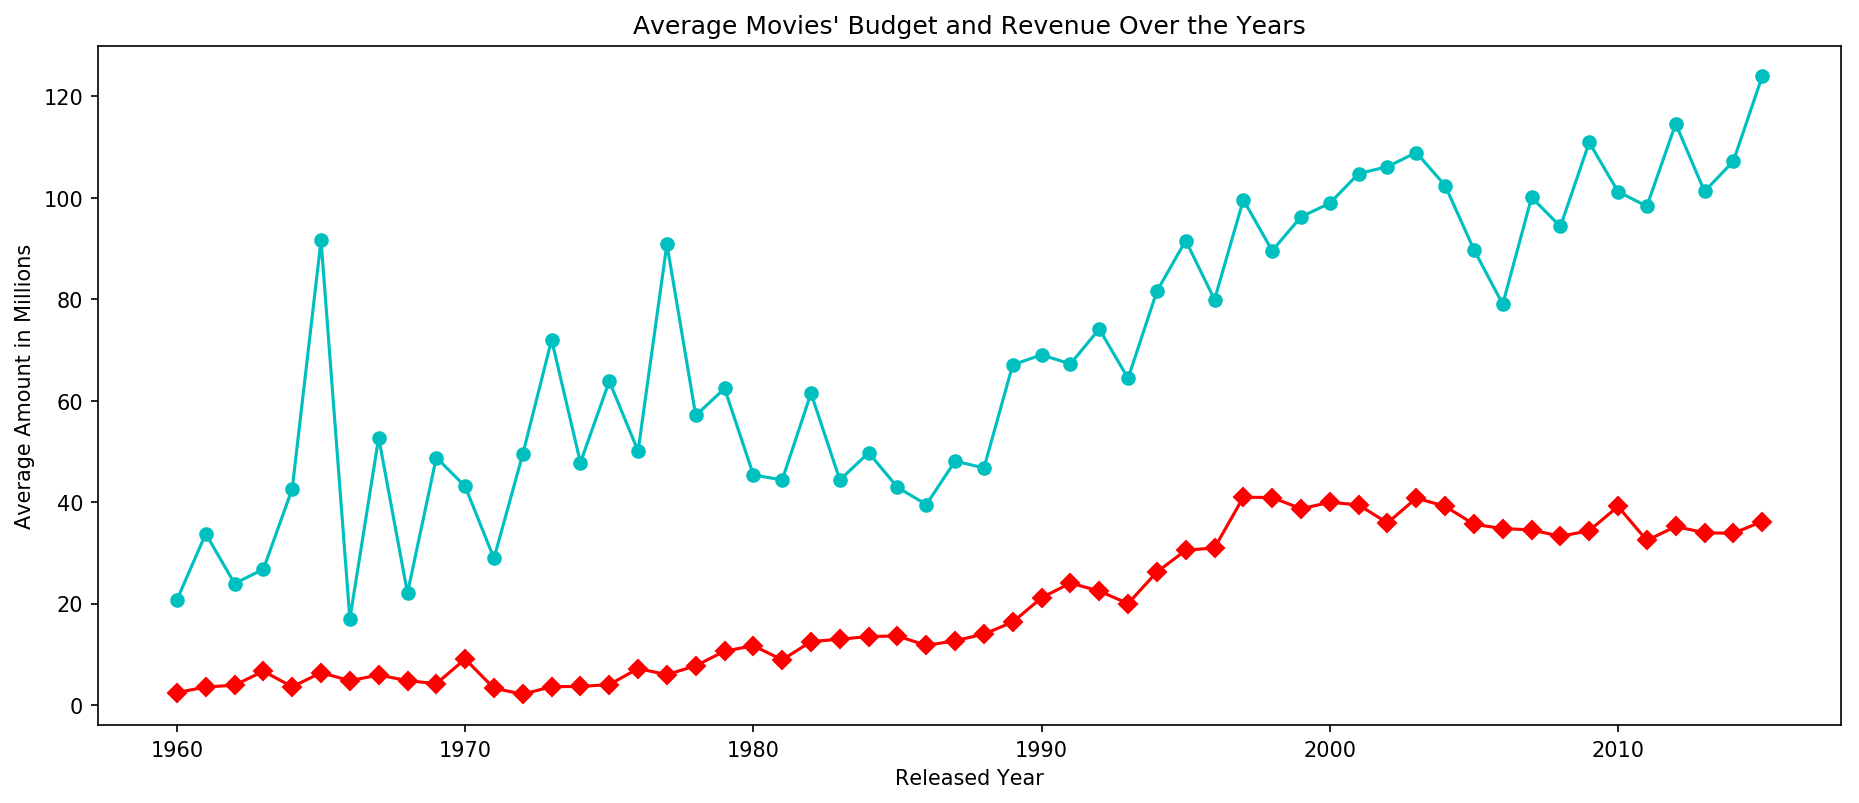

In [82]:
# Plot's Dimensions
plt.figure(figsize=(15,6), dpi = 150)

# Plot Titel & Axes' Labels
plt.title("Average Movies' Budget and Revenue Over the Years")
plt.xlabel('Released Year', fontsize = 10)
plt.ylabel('Average Amount in Millions', fontsize = 10)

# Plotting
plt.plot(AvgBudgetPerYear/1000000, 'r-D',AvgRevenuePerYear/1000000, 'c-o')
plt.show()

As it shown, film industry is getting a great source of profit over the years and a lot of investment is involved in enhancing this industry

### Part#3: What are the most profitable times in film industry?

Let's now have alook on the most profitable preiods over the film industry. This will be divided into `days, weeks, months, seasons and years`. Starting by preparing required data: 

In [85]:
# Calculating the sum of profits per days, weeks, months, seasons and years:
SumProfitsPerDay = tmdb_df.groupby('release_day')['profit'].sum()
SumProfitsPerWeek = tmdb_df.groupby('release_week')['profit'].sum()
SumProfitsPerMonth = tmdb_df.groupby('release_month')['profit'].sum()
SumProfitsPerSeason = tmdb_df.groupby('release_season')['profit'].sum()
SumProfitsPerYear = tmdb_df.groupby('release_year')['profit'].sum()

# Calculating the count of relased movies per days, weeks, months, seasons and years:
CountProfitsPerDay = tmdb_df.groupby('release_day')['original_title'].count()
CountProfitsPerWeek = tmdb_df.groupby('release_week')['original_title'].count()
CountProfitsPerMonth = tmdb_df.groupby('release_month')['original_title'].count()
CountProfitsPerSeason = tmdb_df.groupby('release_season')['original_title'].count()
CountProfitsPerYear = tmdb_df.groupby('release_year')['original_title'].count()

Since all above data will be visualized in the next section, some new functions will be help reducing code redundancy. Each plot will contains 2 graphs: Profit graph followed by Movie Counts graph for the same period:

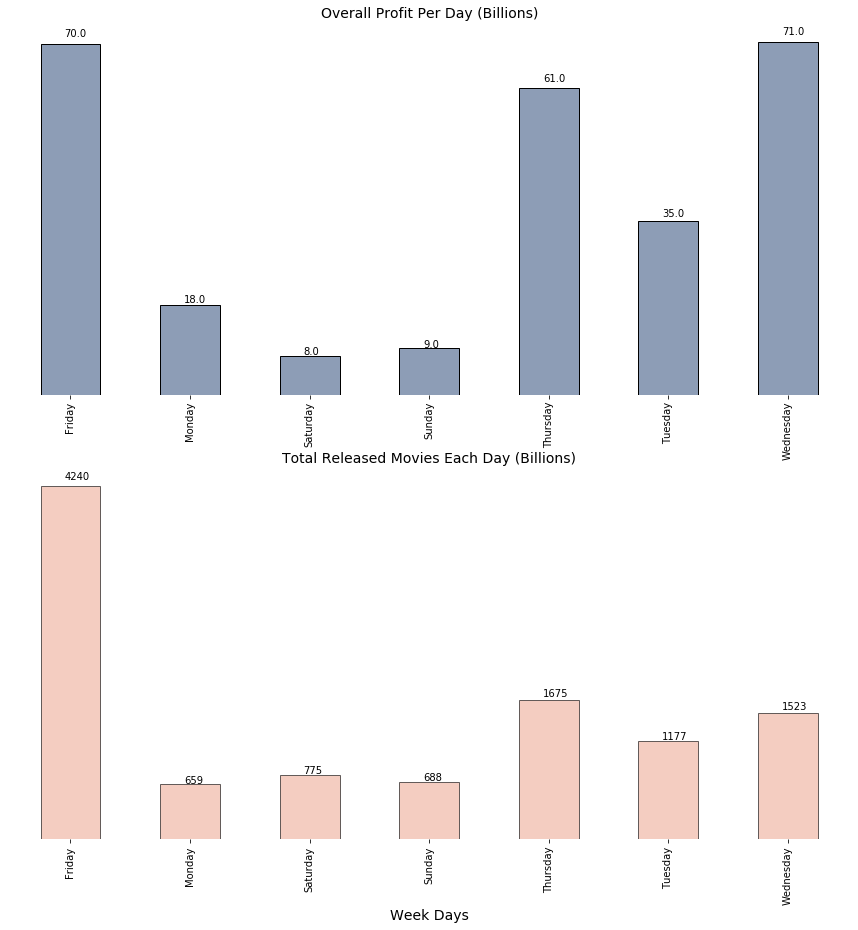

In [86]:
# Preparing Some setup:-

# Function to plot a bar graph for a given dataframe with certain formate:
def plotGraph(df, graphSize, barColor, edgeColor, a, title, xLbl, yLbl, fontSize):
    graph = df.plot(kind='bar', figsize=(graphSize, graphSize), alpha=a, color=barColor ,edgecolor=edgeColor)
    graph.set_title(title, size= fontSize) 
    graph.set_xlabel(xLbl, size = fontSize)
    graph.set_ylabel(yLbl, size = fontSize);
    return graph

# Function to add bars labels at the top center:
def addLabels(graph):
    for p in graph.patches:
        graph.annotate(str(round(p.get_height(),0)), (p.get_x() + (p.get_width()/2)-0.05, p.get_height() * 1.02))       

# Function to delete graph's borders:
def deleteBorders(graph):
    graph.spines['right'].set_visible(False)
    graph.spines['top'].set_visible(False)
    graph.spines['left'].set_visible(False)
    graph.spines['bottom'].set_visible(False)

# Function to delete graph's axis:
def deleteAxis(graph,axis):
    if axis == 'y':
        graph.axes.get_yaxis().set_visible(False)
    if axis == 'x':
        graph.axes.get_xaxis().set_visible(False)
        

# Plots Colors:       
ProfitColors = ['#8d9db6','#bccad6','#667292','#f1e3dd']
CountColors = ['#eeac99','#f9d5e5','#e06377','#c83349']

# Plotting Movies Profits Per Day:
plt.subplot(2,1,1)  
dailyProfit = plotGraph((SumProfitsPerDay/1000000000), 15, ProfitColors[0], 'black', 1, 'Overall Profit Per Day (Billions)','','',14)
addLabels(dailyProfit)
deleteBorders(dailyProfit)
deleteAxis(dailyProfit,'y')

# Plotting Movies Count Per Day:
plt.subplot(2,1,2) 
dailyCount = plotGraph(CountProfitsPerDay, 15,CountColors[0],'black', 0.6, 'Total Released Movies Each Day (Billions)','Week Days','',14)
addLabels(dailyCount)
deleteBorders(dailyCount)
deleteAxis(dailyCount,'y')


Seeams like the most movies are relased during the **weekends**, in which **Friday** has the highest count and profit over the film industry

Let's have a look to movies profits and counts per week number: 

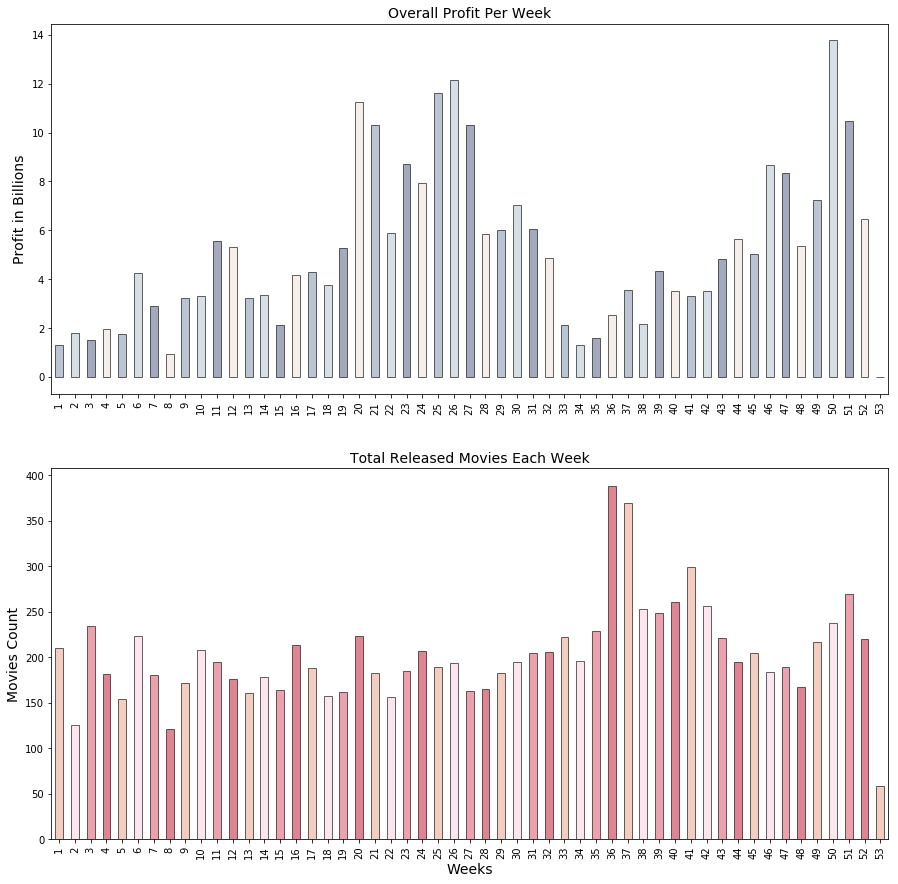

In [89]:
# Plotting Profits Per Week:
plt.subplot(2,1,1)
weeklyProfit = plotGraph((SumProfitsPerWeek/1000000000), 15, ProfitColors, 'black', 0.6, 'Overall Profit Per Week','','Profit in Billions',14)

# Plotting Movies Count Per Week:
plt.subplot(2,1,2) 
weeklyCount = plotGraph(CountProfitsPerWeek, 15, CountColors, 'black', 0.6, 'Total Released Movies Each Week','Weeks','Movies Count',14)


Speaking about the profit, it seems like the **middle** and the **end** of the year are the best periods to generate money while most of the movies are actually released at the **third quarter** of the year. 

Let's have a look to movies profits and counts per  month: 

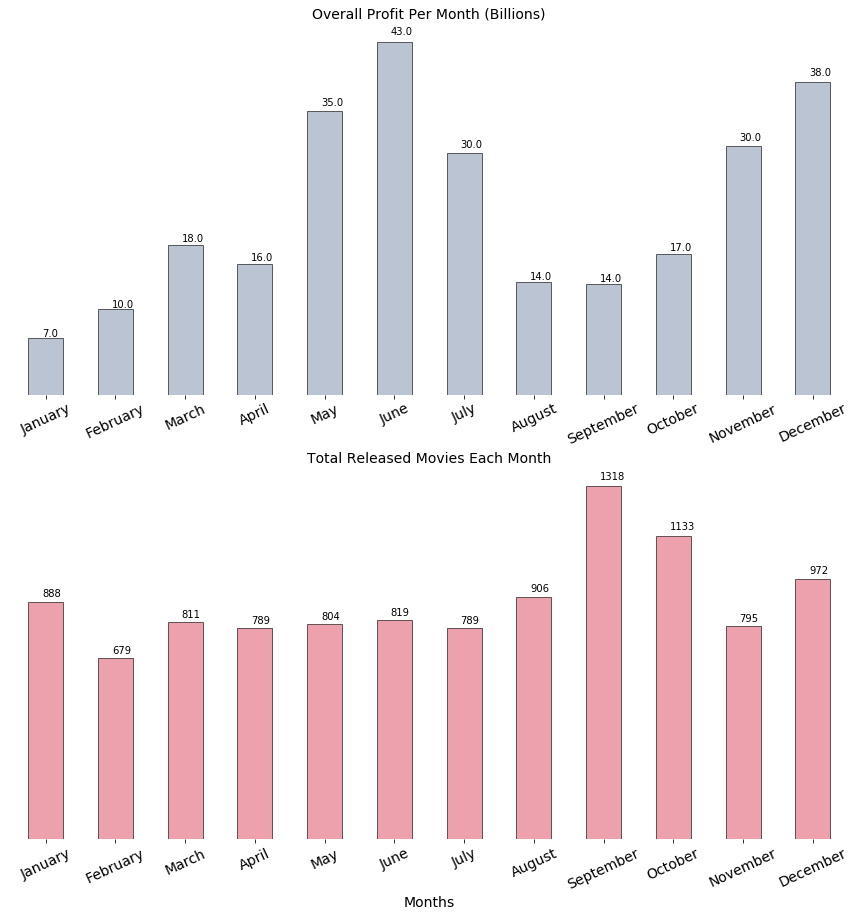

In [694]:
# Plotting Profits Per Month:
months = ['January', 'February', 'March', 'April', 'May', 'June', 
         'July', 'August','September', 'October', 'November', 'December']
plt.subplot(2,1,1) 

monthlyProfit = plotGraph((SumProfitsPerMonth/1000000000), 15, ProfitColors[0], 'black', 0.6, 'Overall Profit Per Month (Billions)','','',14)
monthlyProfit.set_xticklabels(months, size = 14, rotation = 25)
addLabels(monthlyProfit)
deleteBorders(monthlyProfit)
deleteAxis(monthlyProfit,'y')


# Plotting Movies Count Per Month:
plt.subplot(2,1,2) 
monthlyCount = plotGraph(CountProfitsPerMonth, 15, CountColors[2], 'black', 0.6, 'Total Released Movies Each Month','Months','',14)
monthlyCount.set_xticklabels(months, size = 14, rotation = 25)
addLabels(monthlyCount)
deleteBorders(monthlyCount)
deleteAxis(monthlyCount,'y')

This also confirm our finding, **2nd & 4th** quarters are the most profitable periods while the **3rd** quarter has the highest count of released movies. 

Let's have a look to movies profits and counts per  season: 

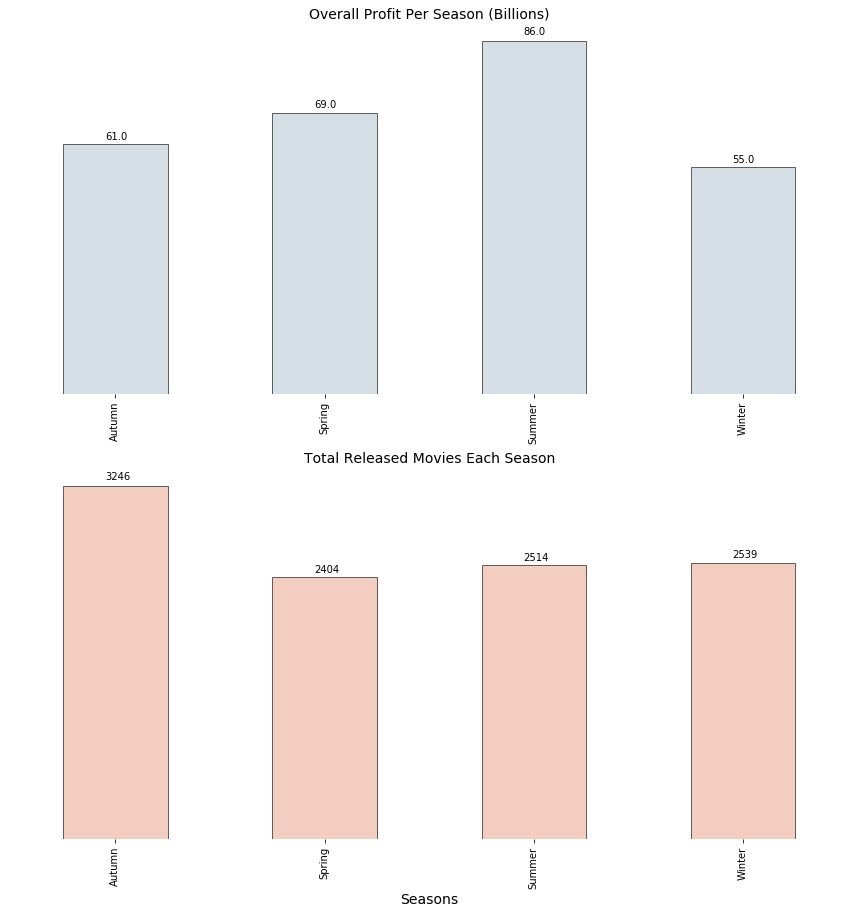

In [699]:
# Plotting Profits Per Season:
plt.subplot(2,1,1)  
SeasonlyProfit = plotGraph((SumProfitsPerSeason/1000000000), 15, ProfitColors[1], 'black', 0.6, 'Overall Profit Per Season (Billions)','','',14)
addLabels(SeasonlyProfit)
deleteBorders(SeasonlyProfit)
deleteAxis(SeasonlyProfit,'y')

# Plotting Movies Count Per Season:
plt.subplot(2,1,2) 
SeasonlyCount = plotGraph(CountProfitsPerSeason, 15, CountColors[0], 'black', 0.6, 'Total Released Movies Each Season','Seasons','',14)
addLabels(SeasonlyCount)
deleteBorders(SeasonlyCount)
deleteAxis(SeasonlyCount,'y')

Third angel also shows that **Autumn** season is the busiest season in trims of newly relased movies while **Summer** is the hottest season for film-makers to generate money. 

Let's have a look to movies profits and counts per year: 

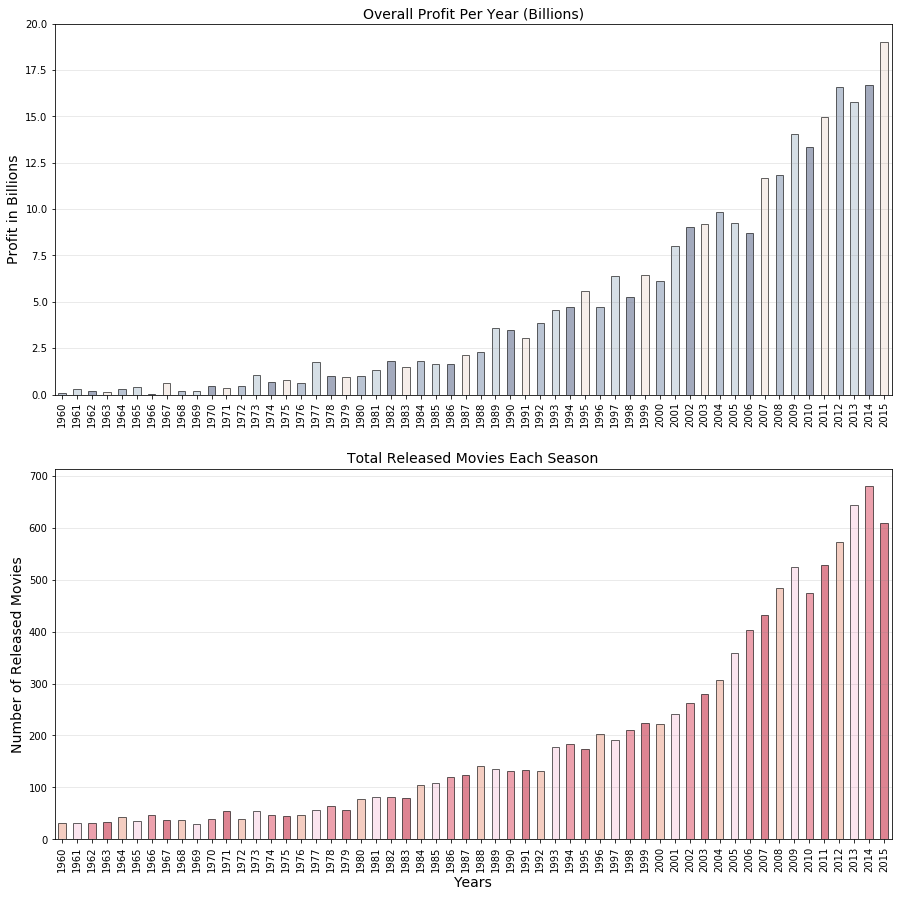

In [707]:
# Plotting Profits Per Year:
plt.subplot(2,1,1)
yearlyProfit = plotGraph((SumProfitsPerYear/1000000000), 15, ProfitColors, 'black', 0.6, 'Overall Profit Per Year (Billions)','','Profit in Billions',14)
yearlyProfit.grid(True, which='major', axis='y', color='gray', alpha=0.2);

# Plotting Movies Count Per Year:
plt.subplot(2,1,2) 
yearlyCount = plotGraph(CountProfitsPerYear, 15, CountColors, 'black', 0.6, 'Total Released Movies Each Season','Years','Number of Released Movies',14)
yearlyCount.grid(True, which='major', axis='y', color='gray', alpha=0.2);


Above graphs shows how film industry are growing so fast over the years. The numbers are doubled more than **10 times** over the past **55 years**, which indicates a grate and rich future for both filmmakers and the audience.

### Part#4: Some interesting facts about the giants of the film industry

In this section, we will show some interesting facts about the film industry over the years. This will includs:

- Top Genres of the produced movies.
- Top Topics that have inspired filmmakers.
- Top Cast in film industry.

#### Preparing required data: 

Having a quick look to `Cast`, `Genres` & `Keywords` columns will clearly indicate that there is an issues that needs to be solved. Values on these column are concatenate and separate be **'|'**. In order to process them, duplicated entries for the targeted column need to be separated, with each element moved into a new row. The values in the other columns are duplicated across the newly divided rows.

Below function just do that and where obtained from **GitHub** reposetry on [this link](https://gist.github.com/jlln/338b4b0b55bd6984f883#gistcomment-2359013) 

In [91]:
###### This code has been copied from Github and used in my project as it's   ######


def splitDataFrameList(df,target_column,separator):
    ''' df = dataframe to split,
    target_column = the column containing the values to split
    separator = the symbol used to perform the split
    returns: a dataframe with each entry for the target column separated, with each element moved into a new row. 
    The values in the other columns are duplicated across the newly divided rows.
    '''
    row_accumulator = []

    def splitListToRows(row, separator):
        split_row = row[target_column].split(separator)
        for s in split_row:
            new_row = row.to_dict()
            new_row[target_column] = s
            row_accumulator.append(new_row)

    df.apply(splitListToRows, axis=1, args = (separator, ))
    new_df = pd.DataFrame(row_accumulator)
    return new_df

This function will be used to clean-up data in `Cast`, `Genres` & `Keywords` columns. A new dataframe will be made for each cleaned set.   

In [95]:
# New dataset called 'tmdbGenres_df' that has values in Genres column splitted:
tmdbGenres_df = splitDataFrameList(tmdb_df,'genres','|')
tmdbGenres_df.head(5)

budget                                               cast  \
0  150000000.0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  150000000.0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
2  150000000.0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
3  150000000.0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
4  150000000.0  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   

            genres                                           keywords  \
0           Action  monster|dna|tyrannosaurus rex|velociraptor|island   
1        Adventure  monster|dna|tyrannosaurus rex|velociraptor|island   
2  Science Fiction  monster|dna|tyrannosaurus rex|velociraptor|island   
3         Thriller  monster|dna|tyrannosaurus rex|velociraptor|island   
4           Action   future|chase|post-apocalyptic|dystopia|australia   

       original_title        profit release_date release_day release_month  \
0      Jurassic World  1.363529e+09   2015-06-09     Tuesday           Jun   
1      Jurassic World  1.363529e+09   2015-06-09     Tuesday           Jun   
2      Jurassic World  1.363529e+09   2015-06-09     Tuesday           Jun   
3      Jurassic World  1.363529e+09   2015-06-09     Tuesday           Jun   
4  Mad Max: Fury Road  2.284364e+08   2015-05-13   Wednesday           May   

  release_season  release_week  release_year       revenue  runtime  
0         Summer            24          2015  1.513529e+09      124  
1         Summer            24          2015  1.513529e+09      124  
2         Summer            24          2015  1.513529e+09      124  
3         Summer            24          2015  1.513529e+09      124  
4         Spring            20          2015  3.784364e+08      120

In [96]:
# New dataset called 'tmdbCast_df' that has values in Cast column splitted:
tmdbCast_df = splitDataFrameList(tmdb_df,'cast','|')
tmdbCast_df.head(5)

budget                 cast  \
0  150000000.0          Chris Pratt   
1  150000000.0  Bryce Dallas Howard   
2  150000000.0          Irrfan Khan   
3  150000000.0    Vincent D'Onofrio   
4  150000000.0        Nick Robinson   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2  Action|Adventure|Science Fiction|Thriller   
3  Action|Adventure|Science Fiction|Thriller   
4  Action|Adventure|Science Fiction|Thriller   

                                            keywords  original_title  \
0  monster|dna|tyrannosaurus rex|velociraptor|island  Jurassic World   
1  monster|dna|tyrannosaurus rex|velociraptor|island  Jurassic World   
2  monster|dna|tyrannosaurus rex|velociraptor|island  Jurassic World   
3  monster|dna|tyrannosaurus rex|velociraptor|island  Jurassic World   
4  monster|dna|tyrannosaurus rex|velociraptor|island  Jurassic World   

         profit release_date release_day release_month release_season  \
0  1.363529e+09   2015-06-09     Tuesday           Jun         Summer   
1  1.363529e+09   2015-06-09     Tuesday           Jun         Summer   
2  1.363529e+09   2015-06-09     Tuesday           Jun         Summer   
3  1.363529e+09   2015-06-09     Tuesday           Jun         Summer   
4  1.363529e+09   2015-06-09     Tuesday           Jun         Summer   

   release_week  release_year       revenue  runtime  
0            24          2015  1.513529e+09      124  
1            24          2015  1.513529e+09      124  
2            24          2015  1.513529e+09      124  
3            24          2015  1.513529e+09      124  
4            24          2015  1.513529e+09      124

In [102]:
# New dataset called 'tmdbKeywords_df' that has values in Keyword column splitted:
# NaN values nned to be replaced with empty vlues

tmdb_df['keywords'] = tmdb_df['keywords'].replace(np.nan,'')
tmdbKeywords_df = splitDataFrameList(tmdb_df,'keywords','|')

# Removing first row that has the count of empty cells 
tmdbKeywords_df = tmdbKeywords_df[tmdbKeywords_df.keywords != '']
tmdbKeywords_df.head(5)

budget                                               cast  \
0  150000000.0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  150000000.0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
2  150000000.0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
3  150000000.0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
4  150000000.0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   

                                      genres           keywords  \
0  Action|Adventure|Science Fiction|Thriller            monster   
1  Action|Adventure|Science Fiction|Thriller                dna   
2  Action|Adventure|Science Fiction|Thriller  tyrannosaurus rex   
3  Action|Adventure|Science Fiction|Thriller       velociraptor   
4  Action|Adventure|Science Fiction|Thriller             island   

   original_title        profit release_date release_day release_month  \
0  Jurassic World  1.363529e+09   2015-06-09     Tuesday           Jun   
1  Jurassic World  1.363529e+09   2015-06-09     Tuesday           Jun   
2  Jurassic World  1.363529e+09   2015-06-09     Tuesday           Jun   
3  Jurassic World  1.363529e+09   2015-06-09     Tuesday           Jun   
4  Jurassic World  1.363529e+09   2015-06-09     Tuesday           Jun   

  release_season  release_week  release_year       revenue  runtime  
0         Summer            24          2015  1.513529e+09      124  
1         Summer            24          2015  1.513529e+09      124  
2         Summer            24          2015  1.513529e+09      124  
3         Summer            24          2015  1.513529e+09      124  
4         Summer            24          2015  1.513529e+09      124

Calculate the top 20 values in each category:

In [99]:
def Top20(df,col):
    return df.groupby(col)['original_title'].count().sort_values(ascending=False).head(20)

Top20Cast = Top20(tmdbCast_df,'cast')
Top20Genres = Top20(tmdbGenres_df,'genres')
Top20Keywords = Top20(tmdbKeywords_df,'keywords')

Now the data is ready to be plotted :) 

In [100]:
#### 4.1 Top genres in files industry:

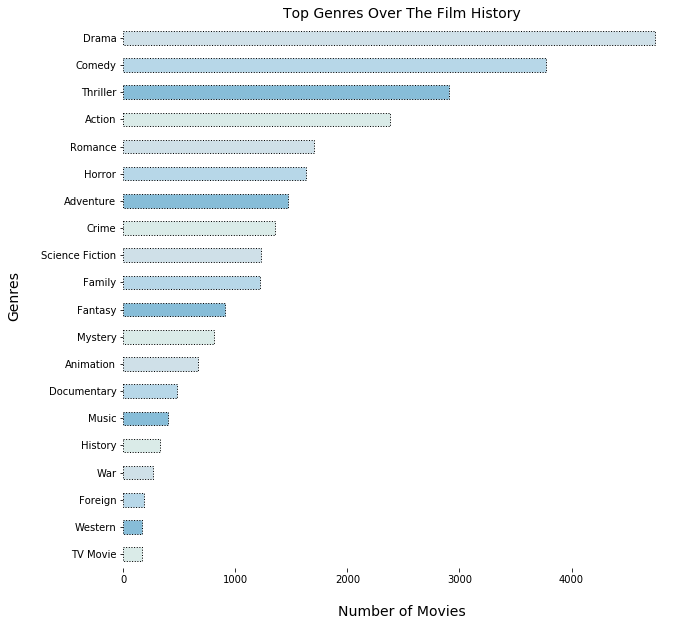

In [101]:
# Plotting Top 20 Genres:
GenresColors = ['#cfe0e8','#b7d7e8','#87bdd8','#daebe8']
genresGraph = Top20Genres.plot.barh(figsize=(10, 10), alpha=1, color=GenresColors ,edgecolor='black', linestyle='dotted')
genresGraph.set_title('Top Genres Over The Film History', size = 14)
genresGraph.set_xlabel('Number of Movies', size = 14, labelpad=20)
genresGraph.set_ylabel('Genres', size = 14,labelpad=20);
genresGraph.invert_yaxis()
deleteBorders(genresGraph)


Amazingly, the **Drama** set at the top of all movies genres through the history, which was envolved in almost half of the movies. The second place was **Comedy** movies which kind of expected and funny and the same time :)

#### 4.2 Top topics that have inspired filmmakers:

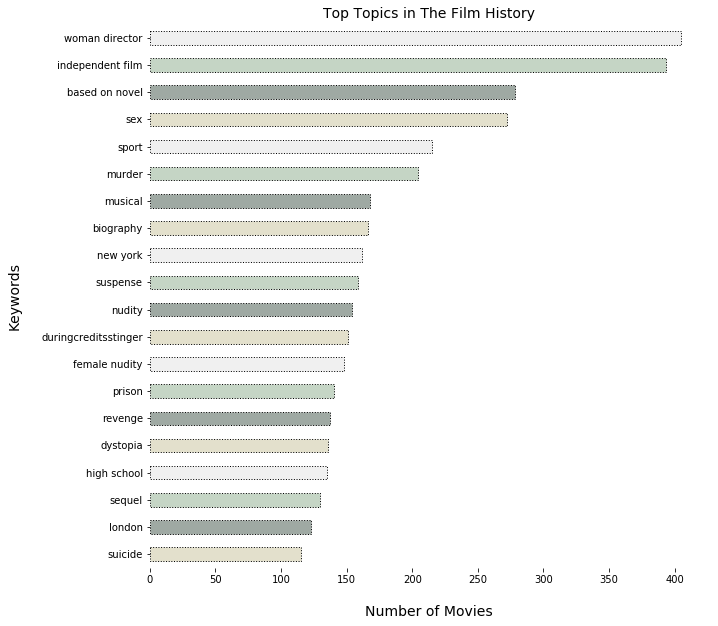

In [103]:
# Plotting Top 20 Genres:
GenresColors = ['#f0f0f0','#c5d5c5','#9fa9a3','#e3e0cc']
keywordsGraph = Top20Keywords.plot.barh(figsize=(10, 10), alpha=1, color=GenresColors ,edgecolor='black', linestyle='dotted')
keywordsGraph.set_title('Top Topics in The Film History', size = 14)
keywordsGraph.set_xlabel('Number of Movies', size = 14, labelpad=20)
keywordsGraph.set_ylabel('Keywords', size = 14,labelpad=20);
keywordsGraph.invert_yaxis()
deleteBorders(keywordsGraph)

The presence of **women** as the hottes topic is clear and strong as it is shown in the previous graph. **Novals & independent** movies are also shown as inspiring topics in the 2nd & 3rd place. Unfortunately, **nudity & sex** were also one of the main topics in movies industry. 

#### 4.3 Top cast in film industry:

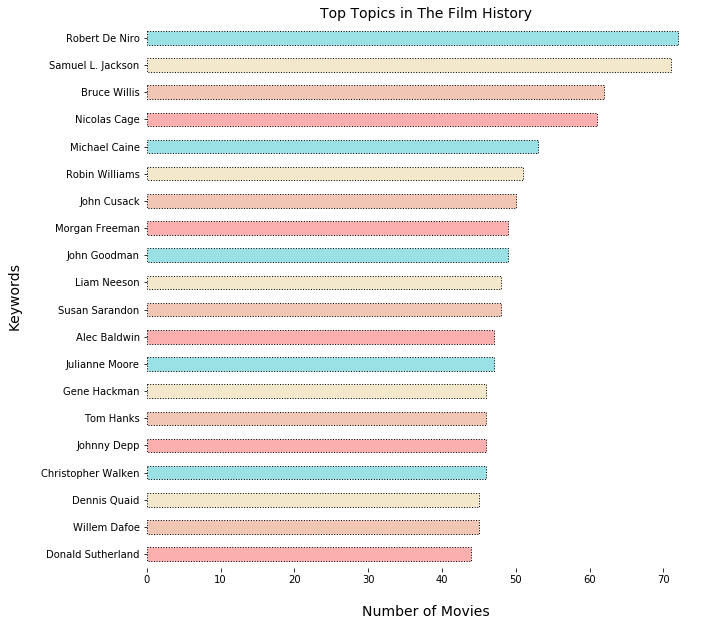

In [757]:
# Plotting Top 20 Genres:
GenresColors = ['#99e1e5','#f3e8cb','#f2c6b4','#fbafaf']
castGraph = Top20Cast.plot.barh(figsize=(10, 10), alpha=1, color=GenresColors ,edgecolor='black', linestyle='dotted')
castGraph.set_title('Top Topics in The Film History', size = 14)
castGraph.set_xlabel('Number of Movies', size = 14, labelpad=20)
castGraph.set_ylabel('Keywords', size = 14,labelpad=20);
castGraph.invert_yaxis()
deleteBorders(castGraph)

#### 1. Robert De Niro [[wiki]](https://en.wikipedia.org/wiki/Robert_De_Niro)
![](https://upload.wikimedia.org/wikipedia/commons/thumb/c/c0/Robert_De_Niro_KVIFF_portrait.jpg/440px-Robert_De_Niro_KVIFF_portrait.jpg)

#### 2. Samuel L. Jackson [[wiki]](https://en.wikipedia.org/wiki/Samuel_L._Jackson)
![](https://upload.wikimedia.org/wikipedia/commons/thumb/1/14/Samuel_L._Jackson_SDCC_2014_crop.jpg/440px-Samuel_L._Jackson_SDCC_2014_crop.jpg)

#### 3. Bruce Willis [[wiki]](https://en.wikipedia.org/wiki/Bruce_Willis)
![](https://upload.wikimedia.org/wikipedia/commons/thumb/c/c4/Bruce_Willis_by_Gage_Skidmore_3.jpg/440px-Bruce_Willis_by_Gage_Skidmore_3.jpg)

#### 4. Nicolas Cage [[wiki]](https://en.wikipedia.org/wiki/Nicolas_Cage)
![](https://upload.wikimedia.org/wikipedia/commons/c/c0/Nicolas_Cage_Deauville_2013.jpg)

#### 5. Morgan Freeman [[wiki]](https://en.wikipedia.org/wiki/Robert_De_Niro)
![](https://pmcdeadline2.files.wordpress.com/2016/08/morgan-freeman-the-story-of-god.jpg?w=446&h=299&crop=1)


<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!